In [1]:
import pandas as pd
import numpy as np

In [2]:
path = '/content/drive/MyDrive/301 Project/data_function_level_embedding/labeled_functionlv_embeddings.csv'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv(path)

In [5]:
# 打乱数据框的行
df = df.sample(frac=1)

In [6]:
df

,code_embedding,label
469,"[0.010965902358293533, 0.0223123449832201, 0.0...",0
98,"[0.012380645610392094, 0.011150271631777287, 0...",0
609,"[0.02869601361453533, -0.004110509995371103, 0...",0
1138,"[0.007257161661982536, 0.03181292116641998, -0...",1
427,"[-0.007320190314203501, 0.004174899775534868, ...",0
...,...,...
519,"[-4.54168621217832e-05, 0.003709567477926612, ...",0
1041,"[0.00647138012573123, -0.0014127896865829825, ...",1
689,"[-0.010452521964907646, 0.0015190488193184137,...",0
690,"[0.0008149921195581555, 0.004516043700277805, ...",0


In [7]:
df.head(5)

,code_embedding,label
469,"[0.010965902358293533, 0.0223123449832201, 0.0...",0
98,"[0.012380645610392094, 0.011150271631777287, 0...",0
609,"[0.02869601361453533, -0.004110509995371103, 0...",0
1138,"[0.007257161661982536, 0.03181292116641998, -0...",1
427,"[-0.007320190314203501, 0.004174899775534868, ...",0


In [8]:
import tensorflow as tf
from tensorflow.keras.metrics import Precision, Recall, AUC
import numpy as np
import ast

# 提取嵌入向量和标签
embeddings = np.stack(df['code_embedding'].apply(lambda x: np.array(ast.literal_eval(x))).values)
labels = df['label'].values

# 转换嵌入和标签为 TensorFlow 张量
X = tf.convert_to_tensor(embeddings, dtype=tf.float32)
y = tf.convert_to_tensor(labels, dtype=tf.int32)

# 分类任务的类别数量
num_classes = len(set(labels))
num_samples, embedding_dim = embeddings.shape

# Define the classifier
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(embedding_dim,)),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

precision = Precision(name='precision')
recall = Recall(name='recall')
auc = AUC(name='auc', curve='ROC')

# 编译模型
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', auc])

# 划分训练集和验证集
train_frac = 0.8
train_size = int(num_samples * train_frac)
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

# 训练模型
# model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_val, y_val))


In [9]:
print(embedding_dim)

1536


Epoch 1/20
59/59 [==============================] - 2s 10ms/step - loss: 0.6457 - accuracy: 0.6241 - auc: 0.6189 - val_loss: 0.6026 - val_accuracy: 0.6352 - val_auc: 0.9444
Epoch 2/20
59/59 [==============================] - 0s 5ms/step - loss: 0.5785 - accuracy: 0.6767 - auc: 0.8633 - val_loss: 0.5374 - val_accuracy: 0.7039 - val_auc: 0.9551
Epoch 3/20
59/59 [==============================] - 0s 5ms/step - loss: 0.5085 - accuracy: 0.7734 - auc: 0.9284 - val_loss: 0.4666 - val_accuracy: 0.7940 - val_auc: 0.9639
Epoch 4/20
59/59 [==============================] - 0s 5ms/step - loss: 0.4422 - accuracy: 0.8281 - auc: 0.9383 - val_loss: 0.4039 - val_accuracy: 0.9227 - val_auc: 0.9668
Epoch 5/20
59/59 [==============================] - 0s 6ms/step - loss: 0.3659 - accuracy: 0.9012 - auc: 0.9653 - val_loss: 0.3404 - val_accuracy: 0.9142 - val_auc: 0.9695
Epoch 6/20
59/59 [==============================] - 0s 5ms/step - loss: 0.3068 - accuracy: 0.9216 - auc: 0.9754 - val_loss: 0.2976 - val_ac

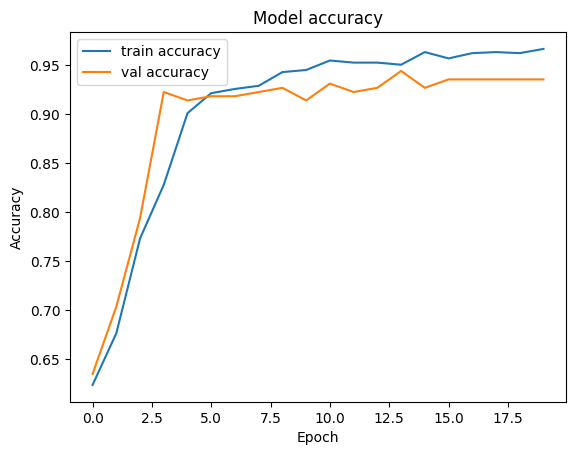

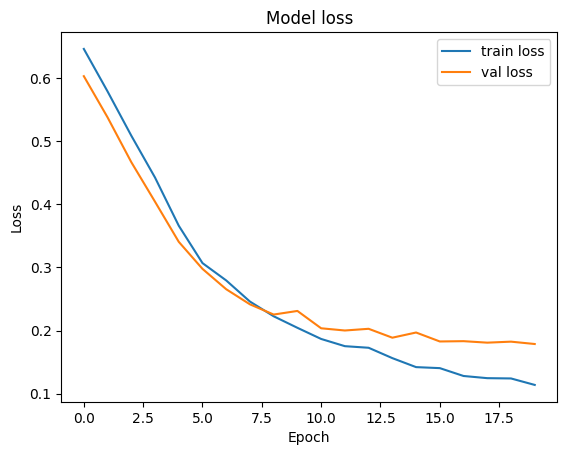

In [10]:
import matplotlib.pyplot as plt

# 训练模型
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_val, y_val))

# 绘制训练集和验证集的准确率随epoch的变化
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# 绘制训练集和验证集的损失函数随epoch的变化
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()